# Heart Attack Analysis & Prediction:

# Data Preprocessing

 # Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

#  Import the data set

In [2]:
dataset=pd.read_csv('heart.csv')

In [3]:
dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# To create feature matrix(x) and dependent variable vector(y)

In [4]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [5]:
x

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [6]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Replacing the missing data

In [7]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(x[:,:])
x[:,:]=imputer.transform(x[:,:])

# Encoding(Not Required)

#  Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=sc.fit_transform(x)

# Data Visualisation

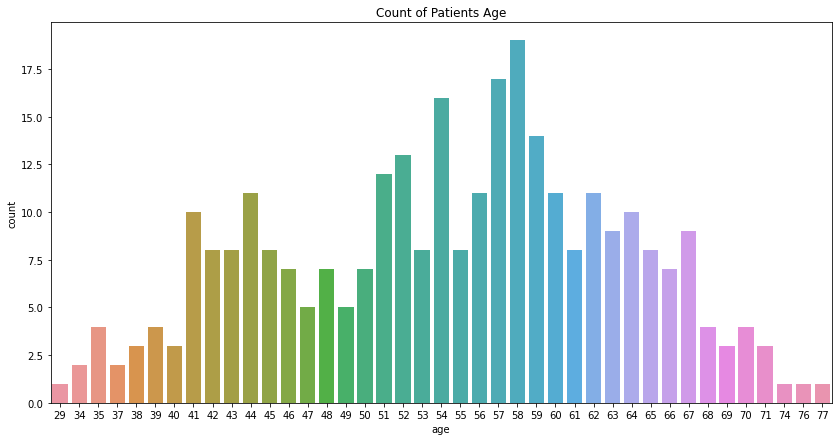

In [9]:
import seaborn as sns
sns.countplot(x=dataset['age'])
plt.gcf().set_size_inches(14,7)
plt.title('Count of Patients Age')
plt.show()

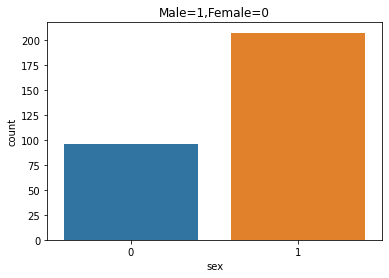

In [10]:
sns.countplot(x=dataset['sex'])
plt.title('Male=1,Female=0')
plt.show()

In [11]:
cp=dataset['cp'].value_counts().reset_index()

In [12]:
cp

,index,cp
0,0,143
1,2,87
2,1,50
3,3,23


In [13]:
cp['index'].replace({0:"typical angina",2:"atypical angina",1:"non-anginal pain",3:"asymptomatic"},inplace=True)

In [14]:
cp

,index,cp
0,typical angina,143
1,atypical angina,87
2,non-anginal pain,50
3,asymptomatic,23


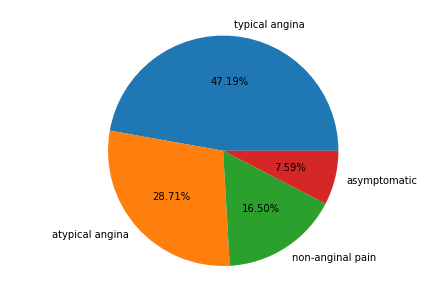

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
index=["typical angina","atypical angina","non-anginal pain","asymptomatic"]
cp=[143,87,50,23]
ax.pie(cp, labels = index,autopct='%1.2f%%')
plt.show()

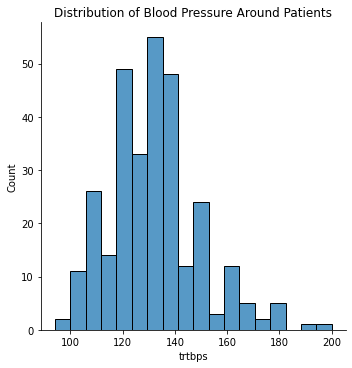

In [16]:
sns.displot(dataset['trtbps'])
plt.title("Distribution of Blood Pressure Around Patients")
plt.show()

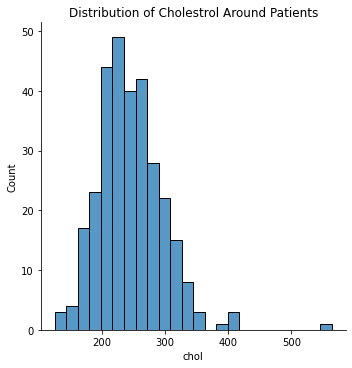

In [17]:
sns.displot(dataset['chol'])
plt.title("Distribution of Cholestrol Around Patients")
plt.show()

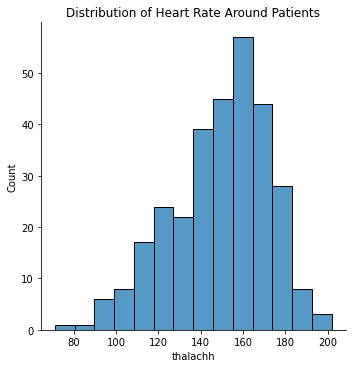

In [18]:
sns.displot(dataset['thalachh'])
plt.title("Distribution of Heart Rate Around Patients")
plt.show()

In [19]:
dataset[['age','output']].value_counts().sort_values().sort_index()

age  output
29   1         1
34   1         2
35   0         2
     1         2
37   1         2
              ..
70   1         1
71   1         3
74   1         1
76   1         1
77   0         1
Length: 75, dtype: int64

In [20]:
age_o=pd.crosstab(dataset['age'],dataset['output']).reset_index()

In [21]:
age_o.columns=['age','low chance','high chance']
age_o

,age,low chance,high chance
0,29,0,1
1,34,0,2
2,35,2,2
3,37,0,2
4,38,1,2
5,39,1,3
6,40,2,1
7,41,1,9
8,42,1,7
9,43,3,5


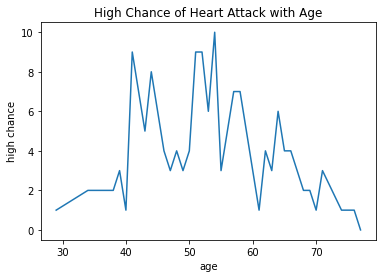

In [22]:
sns.lineplot(y=age_o["high chance"],x=age_o["age"])
plt.title("High Chance of Heart Attack with Age")
plt.show()

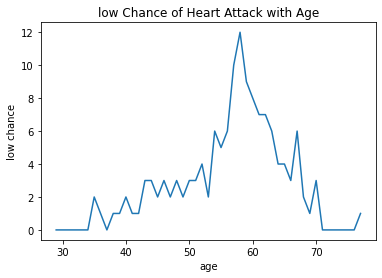

In [23]:
sns.lineplot(y=age_o["low chance"],x=age_o["age"])
plt.title("low Chance of Heart Attack with Age")
plt.show()

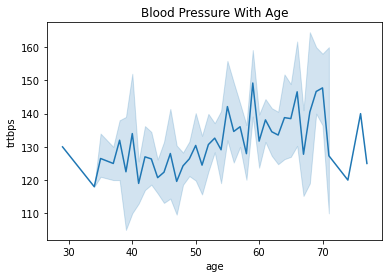

In [24]:
sns.lineplot(y=dataset['trtbps'],x=dataset['age'])
plt.title('Blood Pressure With Age')
plt.show()

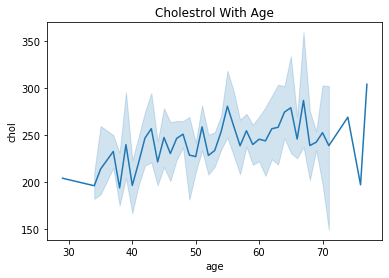

In [25]:
sns.lineplot(y=dataset['chol'],x=dataset['age'])
plt.title('Cholestrol With Age')
plt.show()

In [26]:
# N.B - From above plot, We knew that heart rate decreases with increase in age.

# Spliting to data set into training data set and testing data set

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [28]:
xtrain

array([[-0.26098049,  0.68100522,  1.97312292, ..., -0.64911323,
        -0.71442887, -2.14887271],
       [ 1.39335191, -1.46841752,  1.00257707, ...,  0.97635214,
         0.26508221, -0.51292188],
       [ 0.29046364,  0.68100522,  1.00257707, ...,  0.97635214,
         0.26508221,  1.12302895],
       ...,
       [-2.7976235 ,  0.68100522,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [-0.37126932,  0.68100522, -0.93851463, ...,  0.97635214,
        -0.71442887,  1.12302895],
       [-0.04040284,  0.68100522,  1.00257707, ...,  0.97635214,
        -0.71442887,  1.12302895]])

In [29]:
ytrain

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1],
      dtype=int64)

In [30]:
xtest

array([[ 0.84190778, -1.46841752, -0.93851463,  1.62064933, -1.58979199,
        -0.41763453, -1.00583187, -0.20320974, -0.69663055,  4.45185073,
        -2.27457861,  2.22410436,  1.12302895],
       [ 0.18017482,  0.68100522,  0.03203122, -0.09273778, -0.4882395 ,
        -0.41763453, -1.00583187,  0.58393935, -0.69663055, -0.89686172,
         0.97635214, -0.71442887,  1.12302895],
       [-0.7021358 ,  0.68100522, -0.93851463, -0.09273778,  0.18815239,
         2.394438  , -1.00583187,  0.01544279,  1.43548113, -0.89686172,
         0.97635214,  1.24459328,  1.12302895],
       [ 0.62133012,  0.68100522, -0.93851463, -0.09273778, -0.77812173,
        -0.41763453, -1.00583187, -0.7717063 ,  1.43548113,  1.17360762,
        -0.64911323,  1.24459328,  1.12302895],
       [-0.48155814,  0.68100522, -0.93851463,  1.04952029, -0.06307888,
        -0.41763453, -1.00583187, -0.94662832, -0.69663055,  1.34614673,
        -0.64911323, -0.71442887,  1.12302895],
       [ 0.9521966 ,  0.681005

In [31]:
ytest

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

# Build my classification model

In [32]:
#step 1: Training the classifiaction model
from sklearn.linear_model import LogisticRegression
LOR=LogisticRegression(random_state=0)
LOR.fit(xtrain,ytrain)

LogisticRegression(random_state=0)

In [33]:
# step 2: Predict the classification model
yestimated=LOR.predict(xtest)
np.concatenate((yestimated.reshape(len(yestimated),1),ytest.reshape(len(ytest),1)),1)

array([[0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1]], dtype=int64)

# Performance Matrix

In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,yestimated)
print(cm)

[[20 10]
 [ 6 25]]


In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,yestimated)

0.7377049180327869

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
cm=confusion_matrix(ytest,yestimated)
print(cm)
print(accuracy_score(ytest,yestimated))
print(precision_score(ytest,yestimated))

[[20 10]
 [ 6 25]]
0.7377049180327869
0.7142857142857143


# Build KNN classification model

In [37]:
#training the classification modelfrom sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
KC=KNeighborsClassifier(n_neighbors=10,weights='uniform',p=2)
KC.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=10)

In [38]:
#testing the linear model
yestimated=KC.predict(xtest)

# Performance matrix

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
cm=confusion_matrix(ytest,yestimated)
print(cm)
print(accuracy_score(ytest,yestimated))
print(precision_score(ytest,yestimated))

[[22  8]
 [ 5 26]]
0.7868852459016393
0.7647058823529411


In [40]:
error_rate=[]
for i in range(1,30):
    KC=KNeighborsClassifier(n_neighbors=i)
    KC.fit(xtrain,ytrain)
    bpred_i=KC.predict(xtest)
    error_rate.append(np.mean(bpred_i!=ytest))

Text(0, 0.5, 'Error rate')

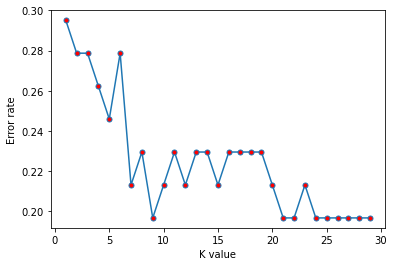

In [41]:
plt.plot(range(1,30),error_rate,marker='o',markerfacecolor='red',markersize=5)
plt.xlabel('K value')
plt.ylabel('Error rate')

In [42]:
acc_rate=[]
for i in range(1,30):
    KC=KNeighborsClassifier(n_neighbors=i)
    KC.fit(xtrain,ytrain)
    bpred_i=KC.predict(xtest)
    acc_rate.append(accuracy_score(ytest,bpred_i))

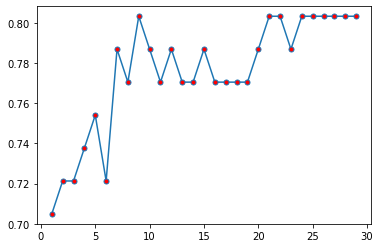

In [43]:
plt.plot(range(1,30),acc_rate,marker='o',markerfacecolor='red',markersize=5)

# Report on The Given Project :

# 1 - Problem Formulation
People suffer from various kinds of diseases because of their unhealthy practices in their daily lives. Such a result could be a heart attack. Can we make an appropriate machine learning model which can predict whether a person can suffer from heart attack or can’t considering the various factors which can lead to it?

# 2 - Algorithm followed

The following two algorithms are followed  :
a - Logistic regression classification
b - K nearest neighbour classification
But in between them KNN classification is most accurate one

# 3 - Dataset

heart.csv dataset is used in the algorithm.The dataset is given below-
●	Age: Age of the patient
●	Sex: Sex of the patient
●	exang: exercise induced angina (1 = yes; 0 = no)
●	ca: number of major vessels (0-3)
●	cp: Chest Pain type chest pain type
o	Value 1: typical angina
o	Value 2: atypical angina
o	Value 3: non-anginal pain
o	Value 4: asymptomatic
●	trtbps: resting blood pressure (in mm Hg)
●	chol: cholesterol in mg/dl fetched via BMI sensor
●	fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
●	rest_ecg: resting electrocardiographic results
o	Value 0: normal
o	Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
o	Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
●	thalach: maximum heart rate achieved
●	target: 0= less chance of heart attack 1= more chance of heart attack



# 4 - Results and Discussion

From the above Project it claerly shown that,the accuracy_score in logistic regression algoritm is around 0.7377049180327869 with precision score of 0.7647058823529411  and accuracy_score in KNN algorithm is around 0.7868852459016393 and precision score of 0.7647058823529411 
Hence KNN gives much more accurate classification of the dataset 'heart.csv' than logistic regression.

# 5- References

The Data set used which is available at -
https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
Other references are -
https://www.w3schools.com/python/python_ml_getting_started.asp
https://matplotlib.org/
https://www.geeksforgeeks.org/machine-learning/